# **Econometrics Practical Application**

**Housing Price Dataset**

**Mounting with the Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading the Dataset**

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Housing_Price/Dataset/data.csv")
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


## **Extracting Primary Information**

In [4]:
print("The Total number of datapoints are : ",data.shape[0])
print("The Total number of columns are : ",data.shape[1])

The Total number of datapoints are :  4600
The Total number of columns are :  18


### **Sneak-Peek into Dataset**

In [5]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### **Columns Names**

In [6]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

### **Column Information**

In [7]:
data.nunique(axis=0)

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [8]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,551962.988473,3.400870,2.160815,2139.346957,14852.516087,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,563834.702547,0.908848,0.783781,963.206916,35884.436145,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000,0.000000,0.000000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,322875.000000,3.000000,1.750000,1460.000000,5000.750000,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,460943.461539,3.000000,2.250000,1980.000000,7683.000000,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,654962.500000,4.000000,2.500000,2620.000000,11001.250000,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,26590000.000000,9.000000,8.000000,13540.000000,1074218.000000,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


As we can see there are some discrepancies with the following columns namely :-
- Price
- Square feet Basement
- Bedrooms
- Bathrooms


Because the values are equal to zero for the following Datapoints.

### **Categorical cloumns**

- Condition
- City
- Statezip
- Country
- view
- waterfront


We will be analysing the levels of the categorical columns one by one.

In [9]:
categorical = ["condition","city","country","view","statezip","waterfront"]
for i in categorical:
  #print (data.i)
  print(i , "levels:",data[i].unique())

condition levels: [3 5 4 2 1]
city levels: ['Shoreline' 'Seattle' 'Kent' 'Bellevue' 'Redmond' 'Maple Valley'
 'North Bend' 'Lake Forest Park' 'Sammamish' 'Auburn' 'Des Moines'
 'Bothell' 'Federal Way' 'Kirkland' 'Issaquah' 'Woodinville'
 'Normandy Park' 'Fall City' 'Renton' 'Carnation' 'Snoqualmie' 'Duvall'
 'Burien' 'Covington' 'Inglewood-Finn Hill' 'Kenmore' 'Newcastle'
 'Mercer Island' 'Black Diamond' 'Ravensdale' 'Clyde Hill' 'Algona'
 'Skykomish' 'Tukwila' 'Vashon' 'Yarrow Point' 'SeaTac' 'Medina'
 'Enumclaw' 'Snoqualmie Pass' 'Pacific' 'Beaux Arts Village' 'Preston'
 'Milton']
country levels: ['USA']
view levels: [0 4 1 2 3]
statezip levels: ['WA 98133' 'WA 98119' 'WA 98042' 'WA 98008' 'WA 98052' 'WA 98115'
 'WA 98038' 'WA 98045' 'WA 98155' 'WA 98105' 'WA 98074' 'WA 98106'
 'WA 98007' 'WA 98092' 'WA 98198' 'WA 98006' 'WA 98102' 'WA 98011'
 'WA 98125' 'WA 98003' 'WA 98136' 'WA 98033' 'WA 98029' 'WA 98117'
 'WA 98034' 'WA 98072' 'WA 98023' 'WA 98107' 'WA 98166' 'WA 98116'
 'WA 9802

As we can see that the categorical column country has only one type of variable USA then it cannot effect the price significantly as its effect should be same on all the data points. 

# **Data Cleaning**

Data CLeaning will consists of the following methods :-
1. Removal of na values
2. Removal of null values
3. Removal of outliers
4. Removal of redundant data

### **na-values checking**

In [10]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

We can see there are no na values.

### **null-values check**

In [11]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

There are no null values.

### **Redundant Data Removal**

In [12]:
data = data.drop(["country","street","statezip"],axis =1)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle


## **Outlier Removal**

For outlier removal we would be calculating the **0.15** and the **0.95 quantiles** and would be removing the data points outside the band.

Calculating the **Quantiles**

In [13]:
quants = np.quantile(data.price,[0.15,0.95])
print("The 1st Quartile value is :",quants[0])
print("The 4th Quartile value is :",quants[1])


The 1st Quartile value is : 265992.5
The 4th Quartile value is : 1184050.0000000002


We would be considering the values within this band anything outside shall be considered as an outlier  and shall be exempted.

**Histogram Plot of Price**

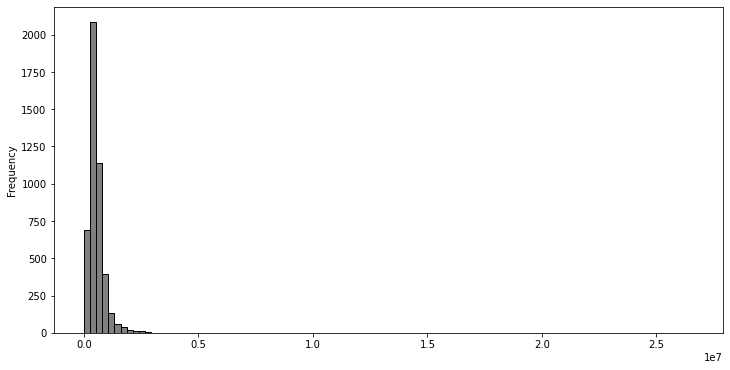

In [14]:
data['price'].plot(kind='hist', bins=100, figsize=(12,6), facecolor='grey',edgecolor='black')#df_cleaned['year'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

Outlier Removal

In [15]:
data = data[data["price"].between(quants[0],quants[1])]

### **Cleaned Dataset**

In [16]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
2,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
5,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,2014-07-08 00:00:00,396166.666667,3.0,1.75,1880,5752,1.0,0,0,4,940,940,1945,0,Seattle
4593,2014-07-08 00:00:00,289373.307692,3.0,2.50,2538,4600,2.0,0,0,3,2538,0,2013,1923,Auburn
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue


In [17]:
print("The Number of Rows in the cleaned Data are:",data.shape[0])
print("The Number of Columns in the cleaned Data are:",data.shape[1])

The Number of Rows in the cleaned Data are: 3680
The Number of Columns in the cleaned Data are: 15


## **Analysing relationships with the other Variables.**

### **Correlation Matrix**

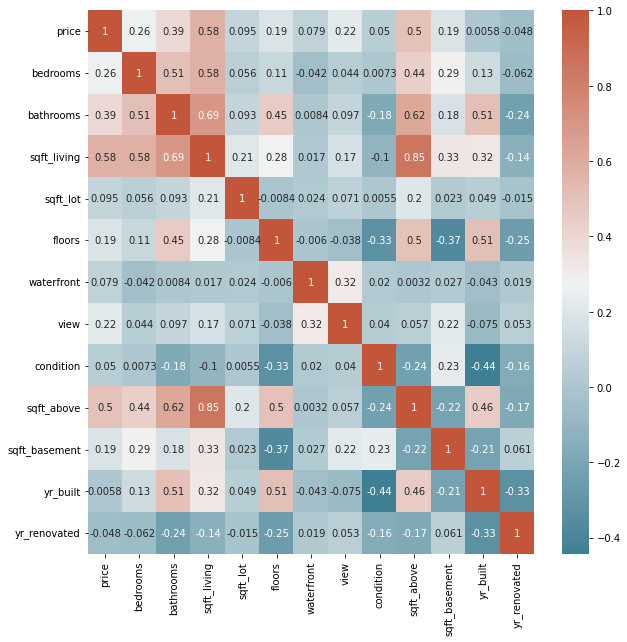

In [18]:
plt.figure(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns , annot = True, cmap = sns.diverging_palette(220 , 20 , as_cmap= True))

There is some amount of positive correlation between :-
1. sqft_above and sqft_living
2. yr_built and bathrooms
3. sqft_above and price
4. sqft_living and price
5. bathrooms and price 

There is some amount of negative correlation between:-
1. condition and floors
2. sqft_basement and floors
3. yr_renovated and floors
4. yr_built and floors
 

### **Scatter Plot**

<Figure size 720x720 with 0 Axes>

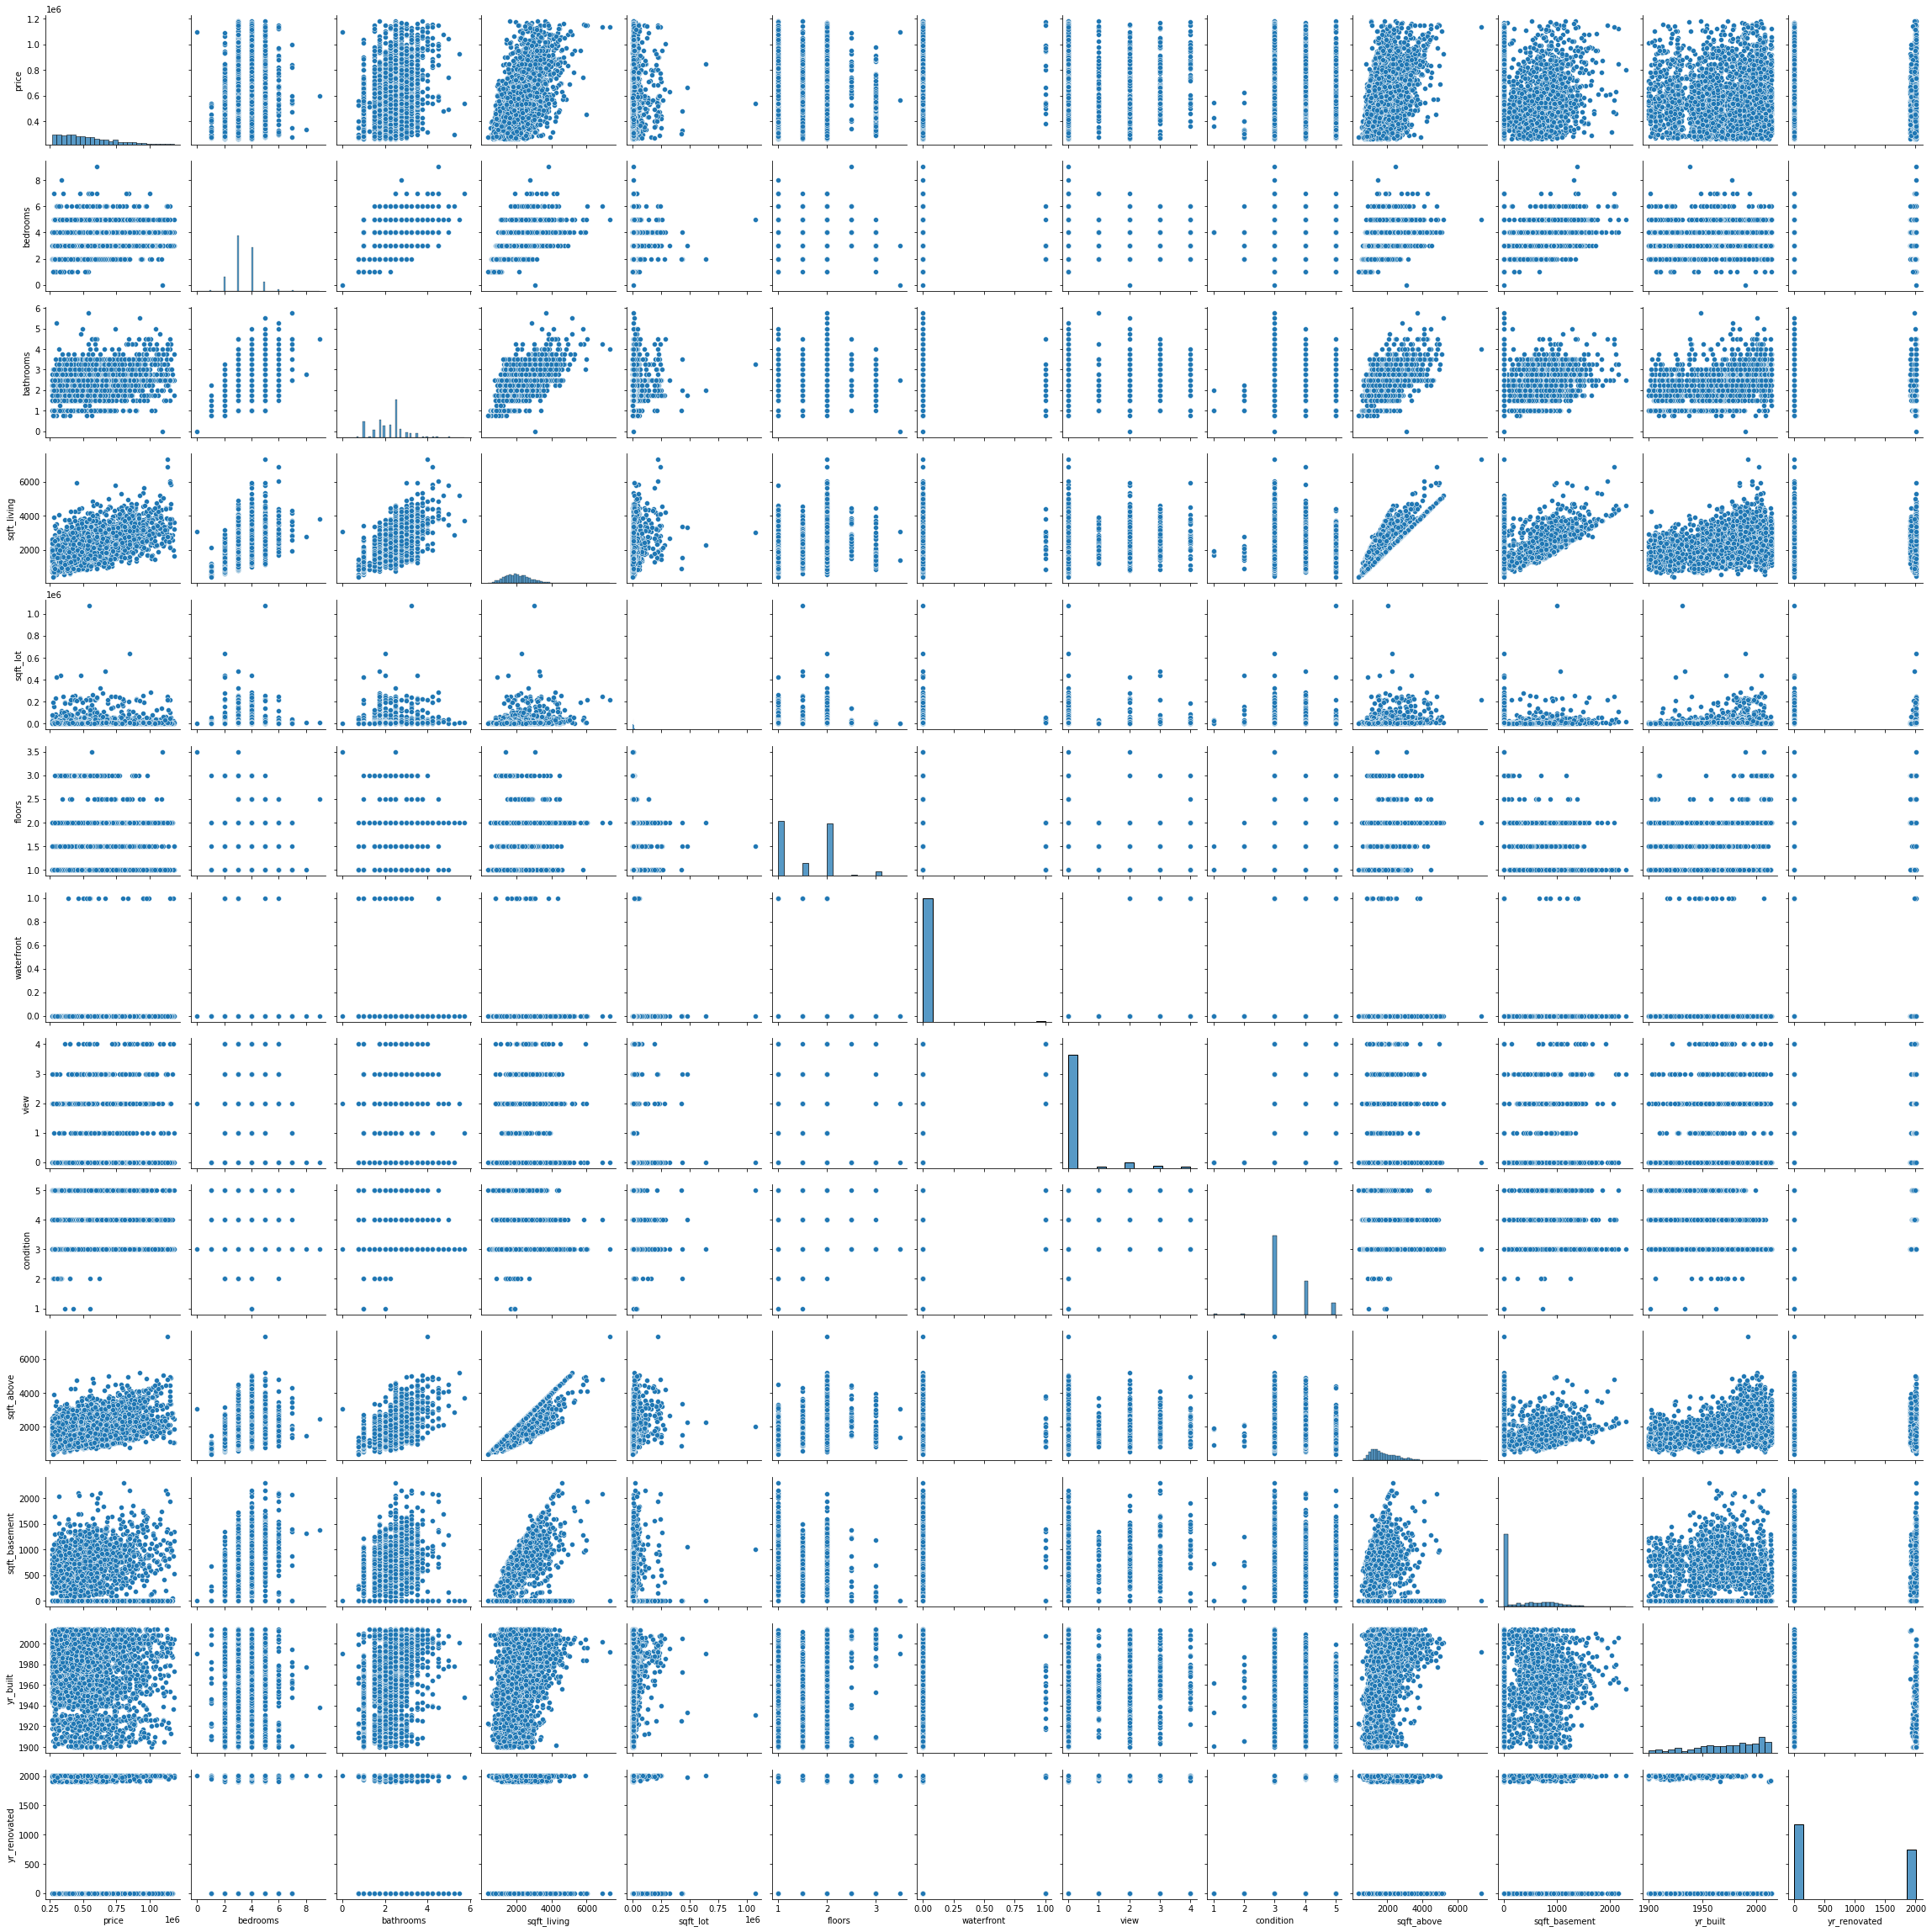

In [19]:
plt.figure(figsize=(10,10))
sns.pairplot(data)

### **Histograms**

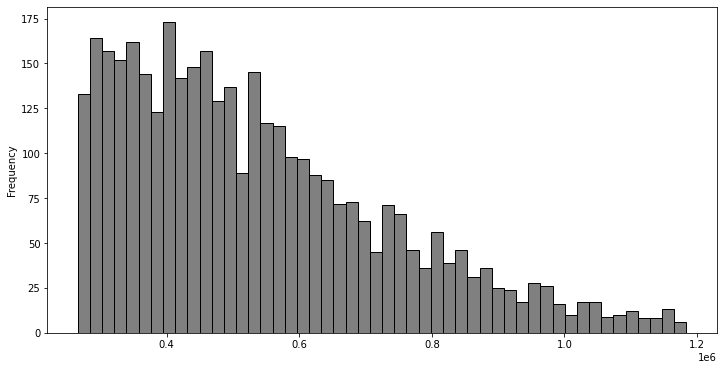

In [20]:
data['price'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

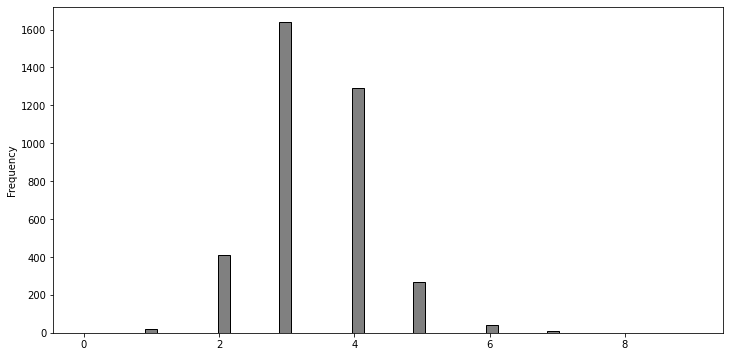

In [21]:
data['bedrooms'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

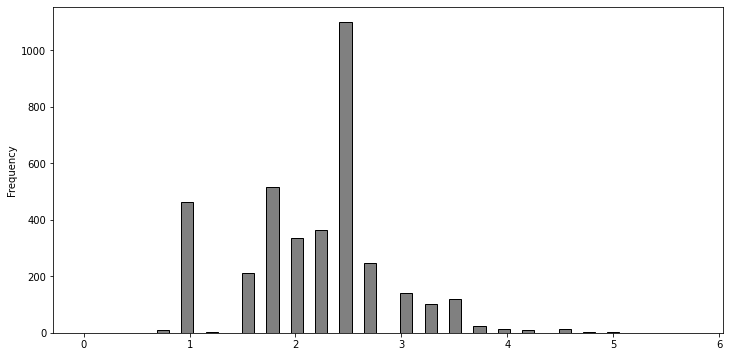

In [22]:
data['bathrooms'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

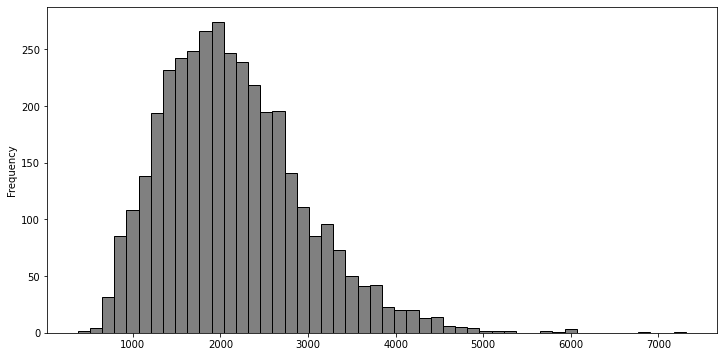

In [23]:
data['sqft_living'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

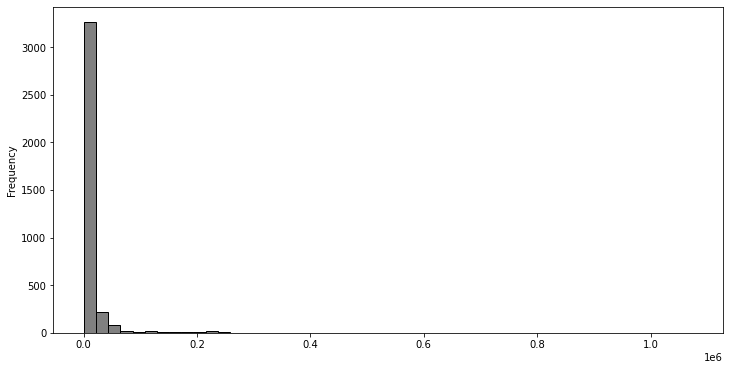

In [24]:
data['sqft_lot'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

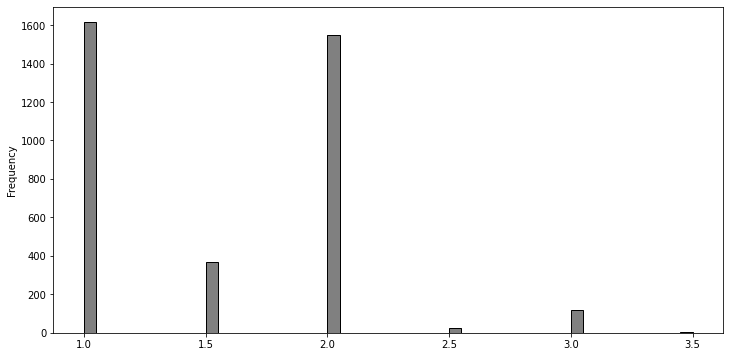

In [25]:
data['floors'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

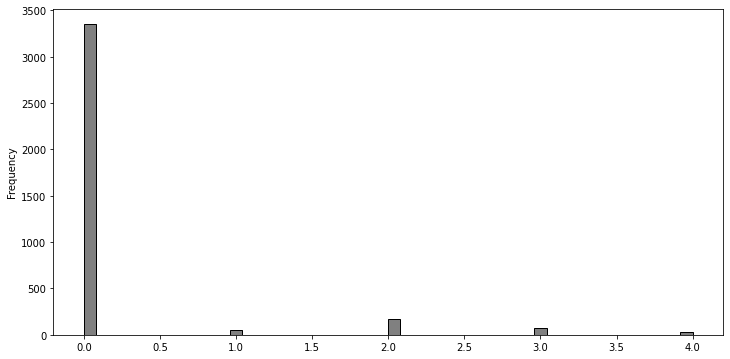

In [26]:
data['view'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

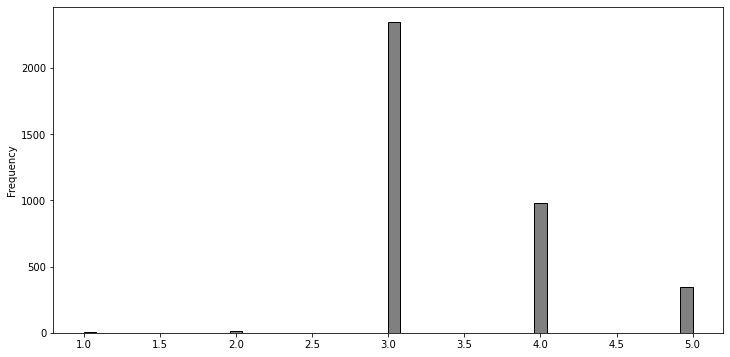

In [27]:
data['condition'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

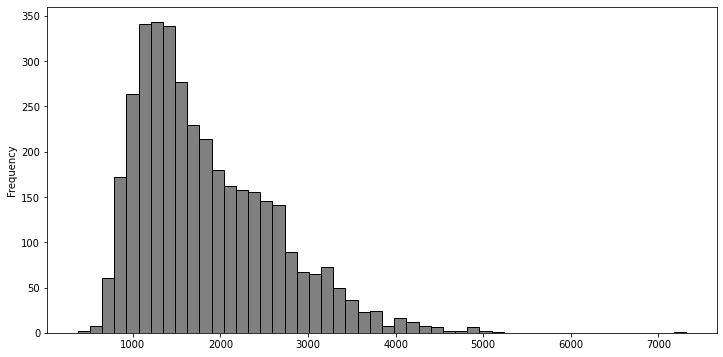

In [28]:
data['sqft_above'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

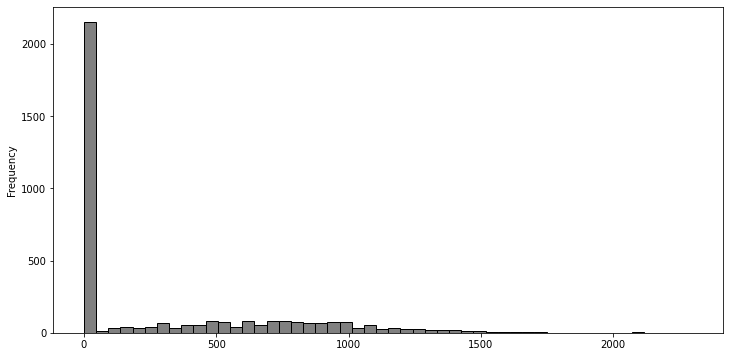

In [29]:
data['sqft_basement'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

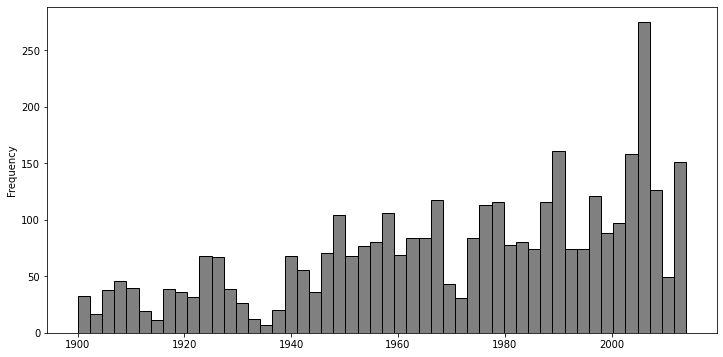

In [30]:
data['yr_built'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

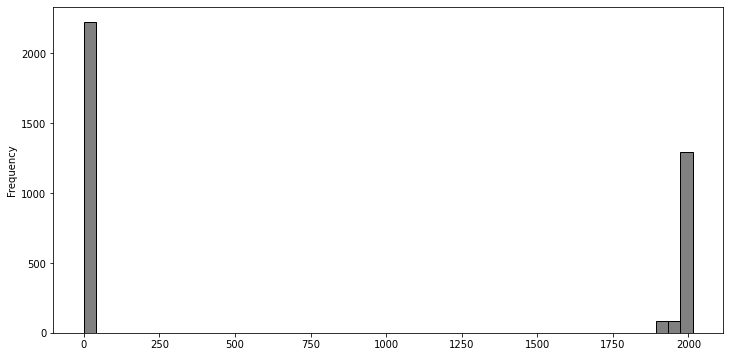

In [31]:
data['yr_renovated'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


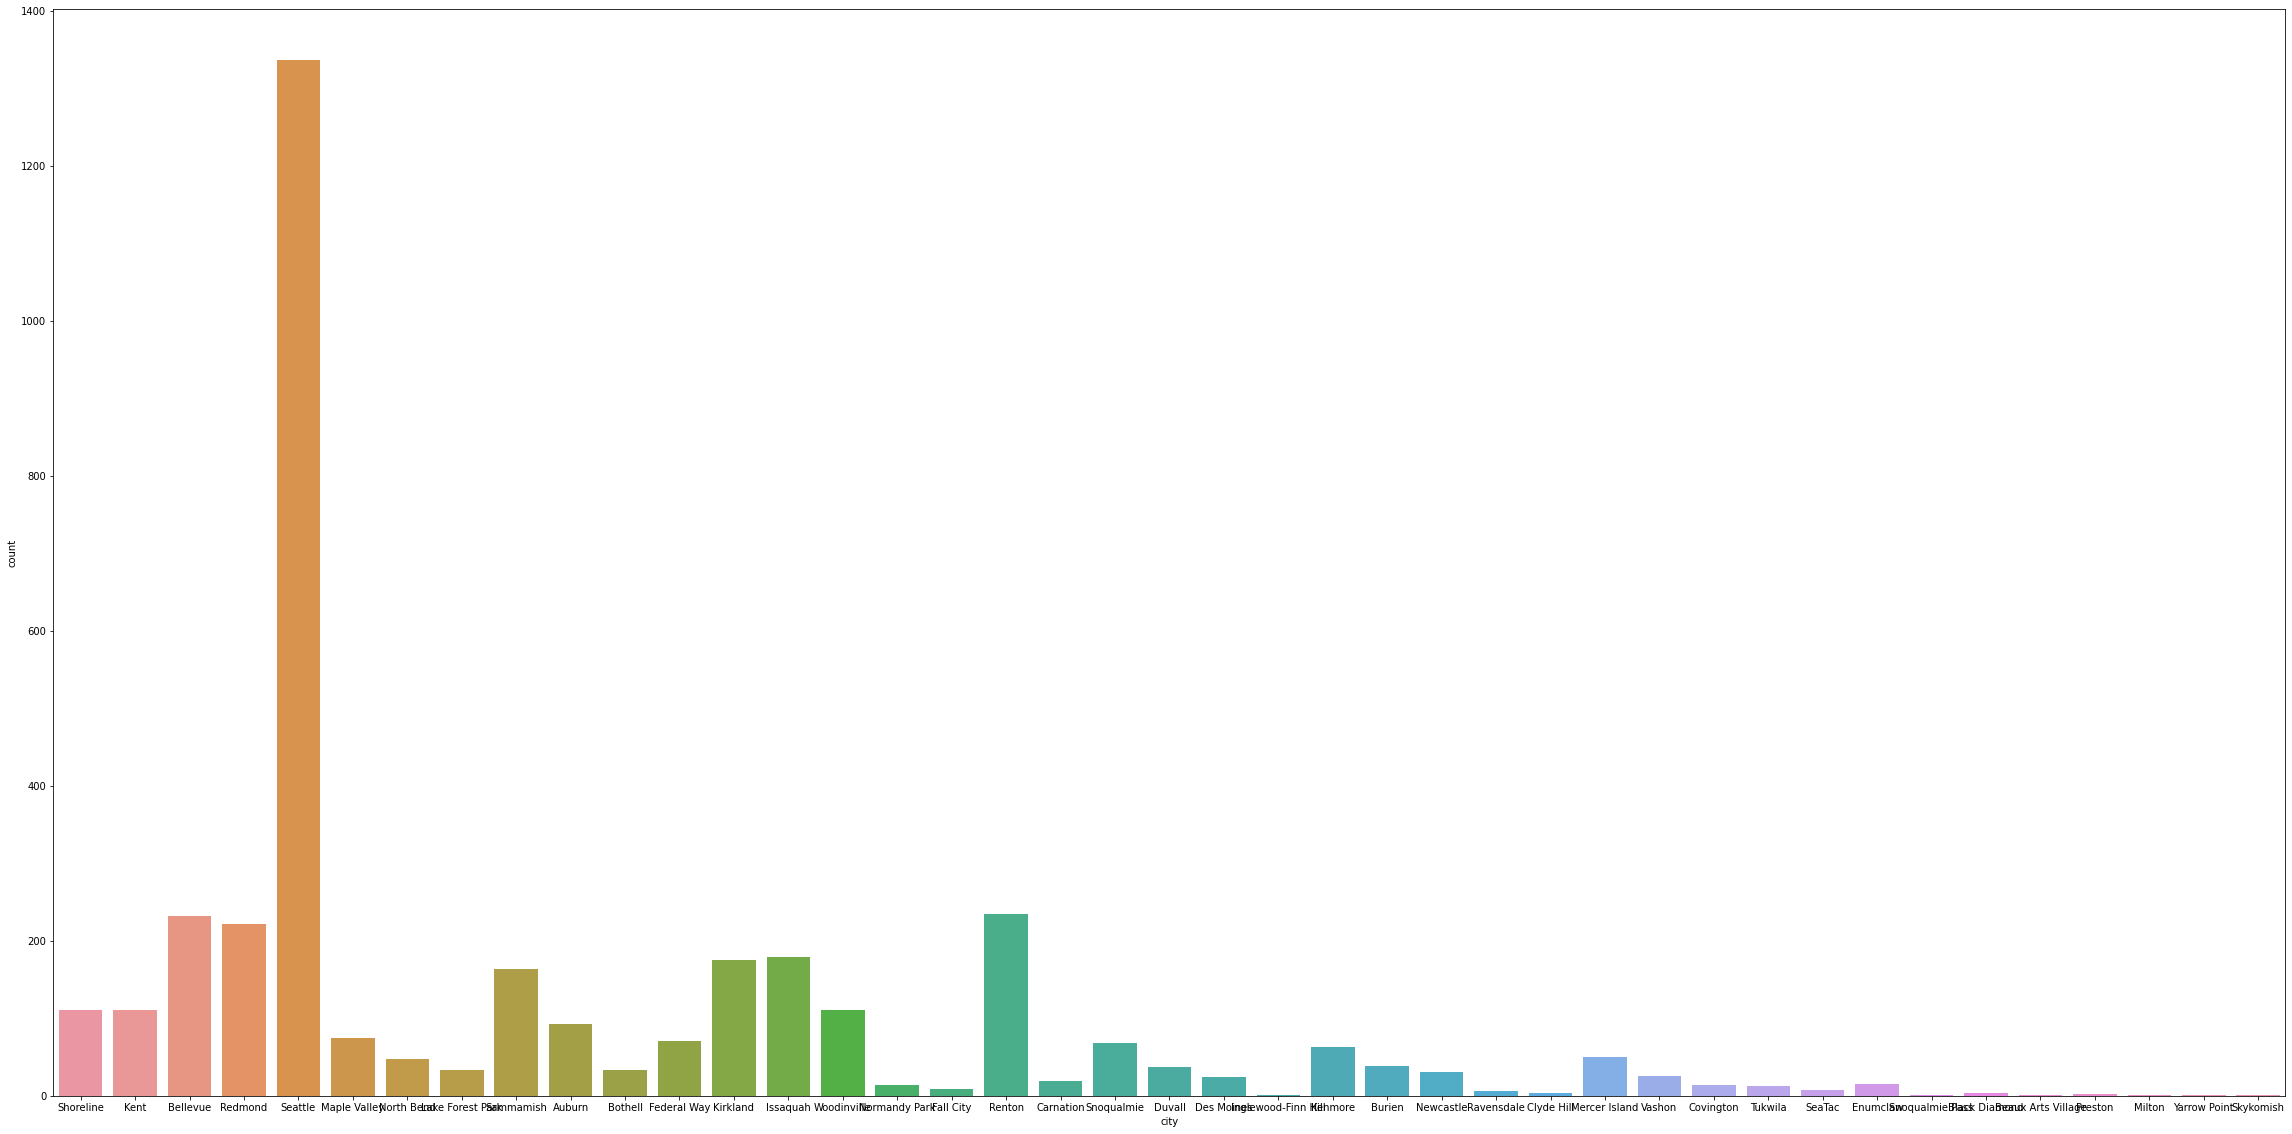

In [32]:
plt.figure(figsize=(40,20))
sns.countplot(data["city"])

Here , we can see that a domination of housing is present at Seattle.

# **Dealing with the Demon**

### **MultiColinearity**

**Multicollinearity** (or collinearity) occurs when one independent variable in a regression model is linearly correlated with another independent variable.


#### **Problems**

1. The fitted regression coefficients (beta hat) will change substantially if one of the values of one of the x variables is changed only a bit.
2. The variance of the estimated coefficients will be inflated, which means that it will be hard to detect statistical significance. Furthermore, it’s possible that the F statistic is significant but the individual t statistics are not.
3. Ultimately, multicollinearity makes prediction less accurate. For a given model, the underlying assumption is that the relationships among the predicting variables, as well as their relationship with the target variable, will be the same. However, when multicollinearity is present, this is less likely to be the case.

#### **Detection**

A simple method to detect multicollinearity in a model is by using something called the variance inflation factor or the VIF for each predicting variable . 

[VIF](https://miro.medium.com/max/620/1*FCyP_2vjy4iN5-JBWJa5Rg.png)

The higher the VIF :
- The more correlated a predictor is with the other predictors
- The more the standard error is inflated
- The larger the confidence interval
- The less likely it is that a coefficient will be evaluated as statistically significant


## **Importing the VIF Module**

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Numerical Data Columns**

In [34]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'city'],
      dtype='object')

Before Moving into the **Variance Inflation Factor** calculation , we will be doing the basic but important **Normalisation**. 

In [35]:
X_variables = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                   'floors','sqft_above',
       'sqft_basement']]
normalised_variables = X_variables.apply(lambda iterator: ((iterator - iterator.mean())/iterator.std()).round(2))
normalised_variables

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,-1.12,-0.48,-1.00,-1.00,-0.19,-0.09,-0.63,-0.71
2,-0.97,-0.48,-0.28,-0.27,-0.09,-1.01,0.12,-0.71
3,-0.58,-0.48,0.08,-0.18,-0.19,-1.01,-1.07,1.57
4,0.07,0.66,0.44,-0.25,-0.12,-1.01,-0.89,1.12
5,-0.23,-1.63,-1.72,-1.56,-0.23,-1.01,-1.22,-0.71
...,...,...,...,...,...,...,...,...
4591,-0.70,-0.48,-0.64,-0.33,-0.25,-1.01,-1.15,1.44
4593,-1.23,-0.48,0.44,0.48,-0.28,0.83,0.90,-0.71
4595,-1.14,-0.48,-0.64,-0.79,-0.23,-1.01,-0.42,-0.71
4596,-0.01,-0.48,0.44,-0.85,-0.20,0.83,-0.48,-0.71


### **Calculation Of VIF**

In [36]:
vif_data = pd.DataFrame()
vif_data["Feature"] = normalised_variables.columns
vif_data["VIF"] = [variance_inflation_factor(normalised_variables.values, i) for i in range(len(normalised_variables.columns))]

In [37]:
vif_data

,Feature,VIF
0,price,1.538485
1,bedrooms,1.618811
2,bathrooms,2.409712
3,sqft_living,54787.873741
4,sqft_lot,1.071155
5,floors,1.779164
6,sqft_above,51155.564809
7,sqft_basement,16082.221861


As we can see that the following variables have a very high amount of **variance inflation factor** value :-
1. sqft_living
2. sqft_above
3. sqft_basement


which is quite intutive as we can understand that they share a very strong relation. Thus we will be rejecting them not manually but we will be using the **PCA** technique which will be taking a well care of the concerned problem.  

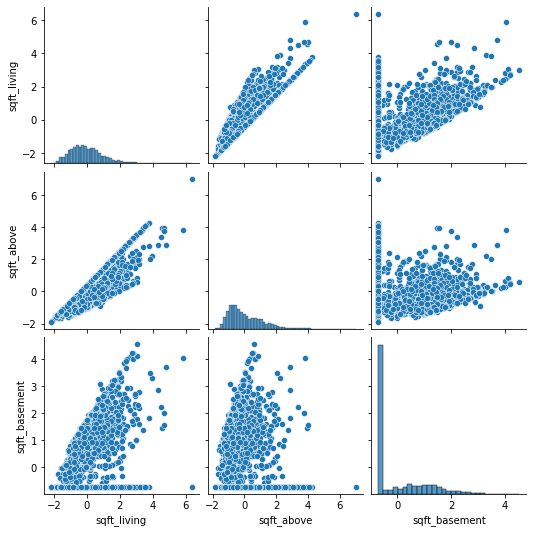

In [38]:
sns.pairplot(normalised_variables[["sqft_living","sqft_above","sqft_basement"]])

## **Dealing The Categorical Variables**

In [39]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'city'],
      dtype='object')

**Listing Down the Categorical Variables**

1. Waterfront
2. View
3. Condition
4. City

* View and waterfront have been dealt in a one hot encoding methodolgy within the dataset.
* Condition has been encoded in numerical encoding manner.
* City is not encoded and we will encode it in the **Dummy Variable** way. 


### **Dummy Variable**

In [40]:
City_dummy = pd.get_dummies(data["city"])
City_dummy

,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,Duvall,Enumclaw,Fall City,Federal Way,Inglewood-Finn Hill,Issaquah,Kenmore,Kent,Kirkland,Lake Forest Park,Maple Valley,Mercer Island,Milton,Newcastle,Normandy Park,North Bend,Preston,Ravensdale,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4593,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4596,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Final Dataset**

We will be using the final dataset by merging three subsets:
1. City_Dummies
2. normalised_variables
3. Other Categorical Variables 

In [41]:
normalised_variables

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,-1.12,-0.48,-1.00,-1.00,-0.19,-0.09,-0.63,-0.71
2,-0.97,-0.48,-0.28,-0.27,-0.09,-1.01,0.12,-0.71
3,-0.58,-0.48,0.08,-0.18,-0.19,-1.01,-1.07,1.57
4,0.07,0.66,0.44,-0.25,-0.12,-1.01,-0.89,1.12
5,-0.23,-1.63,-1.72,-1.56,-0.23,-1.01,-1.22,-0.71
...,...,...,...,...,...,...,...,...
4591,-0.70,-0.48,-0.64,-0.33,-0.25,-1.01,-1.15,1.44
4593,-1.23,-0.48,0.44,0.48,-0.28,0.83,0.90,-0.71
4595,-1.14,-0.48,-0.64,-0.79,-0.23,-1.01,-0.42,-0.71
4596,-0.01,-0.48,0.44,-0.85,-0.20,0.83,-0.48,-0.71


In [42]:
categorical_variables = data[["waterfront","view","condition"]]
categorical_variables

,waterfront,view,condition
0,0,0,3
2,0,0,4
3,0,0,4
4,0,0,4
5,0,0,3
...,...,...,...
4591,0,0,4
4593,0,0,3
4595,0,0,4
4596,0,0,3


In [43]:
final_csv = normalised_variables.join([categorical_variables,City_dummy])
final_csv

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,waterfront,view,condition,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,Duvall,Enumclaw,Fall City,Federal Way,Inglewood-Finn Hill,Issaquah,Kenmore,Kent,Kirkland,Lake Forest Park,Maple Valley,Mercer Island,Milton,Newcastle,Normandy Park,North Bend,Preston,Ravensdale,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,-1.12,-0.48,-1.00,-1.00,-0.19,-0.09,-0.63,-0.71,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,-0.97,-0.48,-0.28,-0.27,-0.09,-1.01,0.12,-0.71,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.58,-0.48,0.08,-0.18,-0.19,-1.01,-1.07,1.57,0,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.07,0.66,0.44,-0.25,-0.12,-1.01,-0.89,1.12,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,-0.23,-1.63,-1.72,-1.56,-0.23,-1.01,-1.22,-0.71,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,-0.70,-0.48,-0.64,-0.33,-0.25,-1.01,-1.15,1.44,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4593,-1.23,-0.48,0.44,0.48,-0.28,0.83,0.90,-0.71,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4595,-1.14,-0.48,-0.64,-0.79,-0.23,-1.01,-0.42,-0.71,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4596,-0.01,-0.48,0.44,-0.85,-0.20,0.83,-0.48,-0.71,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We observe that there are a large number of explanatory variables , so we will go for **Principal Component Analysis** to reduce the dimensions of the dataset.

In [44]:
import statsmodels.api as sml
from statsmodels import tools
X = final_csv.iloc[:,1:]
Y= final_csv["price"]
X_new = tools.add_constant(X)

regressor_OLS = sml.OLS(endog = Y,exog =  X_new).fit()

regressor_OLS.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     133.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:24:27   Log-Likelihood:                -3301.9
No. Observations:                3680   AIC:                             6706.
Df Residuals:                    3629   BIC:                             7023.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.7827      0.069    -11.317      0.000      -0.918      -0.647
bedrooms               -0.0788      0.013     -6.209      0.000      -0.104      -0.054
bathrooms               0.0449      0.016      2.880      0.004       0.014       0.075
sqft_living            -1.8431      2.383     -0.773      0.439      -6.515       2.829
sqft_lot                0.0324      0.011      2.946      0.003       0.011       0.054
floors                 -0.0011      0.014     -0.074      0.941      -0.029       0.027
sqft_above              2.4688      2.302      1.072      0.284      -2.045       6.983
sqft_basement           1.2267      1.289      0.951      0.341      -1.301       3.755
waterfront              0.8007      0.162      4.932      0.000       0.482       1.119
view                    0.1671      0.016     10.461      0.000       0.136       0.198
condition               0.1532      0.016      9.416      0.000       0.121       0.185
Auburn                 -0.9012      0.073    -12.303      0.000      -1.045      -0.758
Beaux Arts Village      1.7982      0.585      3.074      0.002       0.651       2.945
Bellevue                0.8343      0.057     14.739      0.000       0.723       0.945
Black Diamond           0.0417      0.295      0.142      0.887      -0.536       0.619
Bothell                -0.0995      0.110     -0.906      0.365      -0.315       0.116
Burien                 -0.2756      0.103     -2.673      0.008      -0.478      -0.073
Carnation              -0.3264      0.141     -2.323      0.020      -0.602      -0.051
Clyde Hill              2.1901      0.340      6.446      0.000       1.524       2.856
Covington              -1.0287      0.161     -6.375      0.000      -1.345      -0.712
Des Moines             -0.5967      0.128     -4.678      0.000      -0.847      -0.347
Duvall                 -0.3988      0.104     -3.818      0.000      -0.604      -0.194
Enumclaw               -0.8310      0.159     -5.235      0.000      -1.142      -0.520
Fall City               0.0245      0.199      0.123      0.902      -0.366       0.415
Federal Way            -0.9906      0.081    -12.278      0.000      -1.149      -0.832
Inglewood-Finn Hill    -0.0343      0.586     -0.059      0.953      -1.182       1.114
Issaquah                0.2567      0.060      4.258      0.000       0.138       0.375
Kenmore                -0.1060      0.084     -1.257      0.209      -0.271       0.059
Kent                   -0.8702      0.069    -12.604      0.000      -1.006      -0.735
Kirkland                0.5090      0.060      8.420      0.000       0.390       0.628
Lake Forest Park       -0.0887      0.110     -0.807      0.420      -0.304       0.127
Maple Valley           -0.7099      0.079     -8.949      0.000      -0.865      -0.554
Mer

**Condition Number** is huge. So , this should be dealth with.


## **Principal Component Analysis - Our Saviour**

Here is the short summary of the required steps:
1. **Scale the data** — we don’t want some feature to be voted as “more important” due to scale differences. 10m = 10000mm, but the algorithm isn’t aware of meters and millimeters (sorry US readers)
2. **Calculate covariance matrix** — square matrix giving the covariances between each pair of elements of a random vector
3. **Eigen decomposition** — we’ll get to that .


**Features**

In [45]:
features = final_csv.iloc[:,1:] 
features

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,waterfront,view,condition,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,Duvall,Enumclaw,Fall City,Federal Way,Inglewood-Finn Hill,Issaquah,Kenmore,Kent,Kirkland,Lake Forest Park,Maple Valley,Mercer Island,Milton,Newcastle,Normandy Park,North Bend,Preston,Ravensdale,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,-0.48,-1.00,-1.00,-0.19,-0.09,-0.63,-0.71,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,-0.48,-0.28,-0.27,-0.09,-1.01,0.12,-0.71,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.48,0.08,-0.18,-0.19,-1.01,-1.07,1.57,0,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.66,0.44,-0.25,-0.12,-1.01,-0.89,1.12,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,-1.63,-1.72,-1.56,-0.23,-1.01,-1.22,-0.71,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,-0.48,-0.64,-0.33,-0.25,-1.01,-1.15,1.44,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4593,-0.48,0.44,0.48,-0.28,0.83,0.90,-0.71,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4595,-0.48,-0.64,-0.79,-0.23,-1.01,-0.42,-0.71,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4596,-0.48,0.44,-0.85,-0.20,0.83,-0.48,-0.71,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Covariance Matrix**

In [46]:
cov_matrix = np.cov(features.T)
cov_matrix

array([[ 9.98144777e-01,  5.05266690e-01,  5.76946910e-01, ...,
        -4.97023943e-03,  4.11157185e-03, -1.30527849e-04],
       [ 5.05266690e-01,  1.00199743e+00,  6.95436819e-01, ...,
        -2.46306889e-03,  6.44697579e-03, -4.67326306e-04],
       [ 5.76946910e-01,  6.95436819e-01,  9.99816852e-01, ...,
        -1.44076249e-03,  1.78520215e-02, -2.22892563e-04],
       ...,
       [-4.97023943e-03, -2.46306889e-03, -1.44076249e-03, ...,
         7.01720694e-03, -2.13166385e-04, -1.92041788e-06],
       [ 4.11157185e-03,  6.44697579e-03,  1.78520215e-02, ...,
        -2.13166385e-04,  2.92611857e-02, -8.19870712e-06],
       [-1.30527849e-04, -4.67326306e-04, -2.22892563e-04, ...,
        -1.92041788e-06, -8.19870712e-06,  2.71739130e-04]])

**Eigen Decomposition**

In [47]:
values, vectors = np.linalg.eig(cov_matrix)
values

array([3.19474875e+00, 1.63019439e+00, 1.01698532e+00, 6.08731879e-01,
       5.02961675e-01, 4.07191767e-01, 3.66533692e-01, 3.00778242e-01,
       1.55436588e-01, 6.30959891e-02, 5.96515229e-02, 5.45083821e-02,
       4.70573536e-02, 4.39210381e-02, 3.66312188e-02, 2.98957615e-02,
       2.89841278e-02, 2.59362002e-02, 2.23346897e-02, 1.96483133e-02,
       1.87405475e-02, 1.72707223e-02, 1.43732122e-02, 1.30961837e-02,
       1.12716803e-02, 1.01453499e-02, 9.42513030e-03, 8.94027726e-03,
       8.43823962e-03, 7.48839428e-03, 6.55641874e-03, 5.26907426e-03,
       4.26108282e-03, 3.86445203e-03, 3.78778167e-03, 3.55151769e-03,
       3.29394264e-03, 2.50793230e-03, 2.21626307e-03, 1.63148963e-03,
       1.11793846e-03, 8.35741688e-04, 5.55360014e-04, 7.68012200e-06,
       3.13203071e-04, 1.62192306e-17, 2.70831742e-04, 2.70854607e-04,
       2.71511563e-04, 2.71716168e-04, 2.71800631e-04])

**Eigen Vectors**

In [48]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
#print("The Total Ratio:",np.sum(explained_variances))
print("The explainability Power of the features are as follows :")
print(explained_variances)     

The explainability Power of the features are as follows :
[0.3640513941806832, 0.18576563847197317, 0.11588858868302317, 0.06936686011647597, 0.05731402167522807, 0.0464007476737016, 0.041767635599603725, 0.034274600884111286, 0.017712474795645545, 0.007189981010562127, 0.006797473547952121, 0.0062113969135385045, 0.005362329413797217, 0.005004936677113928, 0.004174239459631014, 0.0034067134912623307, 0.0033028300460059864, 0.0029555093723757126, 0.0025451062284834627, 0.002238985412240646, 0.0021355427216165814, 0.001968051647414461, 0.001637871511801369, 0.001492350202486235, 0.0012844424617360387, 0.00115609366251003, 0.001074022435040882, 0.0010187719471163397, 0.0009615632225070007, 0.0008533254399501611, 0.000747123975623022, 0.0006004271328178633, 0.000485563424493746, 0.00044036613301846124, 0.00043162931003638637, 0.0004047063068347525, 0.0003753548424172471, 0.00028578655850886275, 0.00025254995787643526, 0.00018591323516889248, 0.00012739250849342092, 9.523532243270246e-05, 

**Number of Variables that have an explainability power of 90 percent**

In [49]:
percent=0
for i in range(len(explained_variances)):
  if sum(explained_variances[0:i])>=.90 :
    print("The Explainability of the features are only confined to :",i,"Variables")
    break
  else:
    continue

The Explainability of the features are only confined to : 8 Variables


**Projected Variables**

In [50]:
projected_1 = features.dot(vectors.T[0])
projected_2 = features.dot(vectors.T[1])
projected_3 = features.dot(vectors.T[2])
projected_4 = features.dot(vectors.T[3])
projected_5 = features.dot(vectors.T[4])
projected_6 = features.dot(vectors.T[5])
projected_7 = features.dot(vectors.T[6])
projected_8 = features.dot(vectors.T[7])

res = pd.DataFrame({'PC1':projected_1})
res['PC2'] = projected_2
res['PC3'] = projected_3
res['PC4'] = projected_4
res['PC5'] = projected_5
res['PC6'] = projected_6
res['PC7'] = projected_7
res['PC8'] = projected_8


In [51]:
res1 = res.copy()
res1.to_numpy(dtype="float64")

array([[-1.82859721,  0.05886739, -0.16818032, ...,  0.9513753 ,
         2.71672966,  0.23063464],
       [-1.06482744, -0.62139122, -0.4361591 , ...,  0.65453113,
         3.65677626,  0.86364434],
       [-1.31071645, -2.53901717,  0.10693389, ...,  0.11436498,
         3.50912659,  0.62196174],
       ...,
       [-1.89757663, -0.64444221, -0.18363538, ...,  0.95212368,
         3.61838983,  0.54280547],
       [-0.71437821,  0.47276786,  0.21346324, ...,  0.7650926 ,
         3.01033544,  0.9007404 ],
       [ 1.25338606,  0.56988045, -0.04292253, ...,  0.31516537,
         3.31535147,  0.02438384]])

**Our Dimensionally reduced Dataframe**

In [52]:
res1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.828597,0.058867,-0.168180,0.625515,0.000394,0.951375,2.716730,0.230635
2,-1.064827,-0.621391,-0.436159,1.061558,0.739514,0.654531,3.656776,0.863644
3,-1.310716,-2.539017,0.106934,-0.171264,0.022400,0.114365,3.509127,0.621962
4,-0.674508,-2.479047,0.220822,0.554912,-0.485242,0.611105,3.319589,0.937335
5,-3.548358,-0.096881,-0.425823,0.247608,0.428431,0.649648,2.693489,0.081003
...,...,...,...,...,...,...,...,...
4591,-1.893717,-2.406285,0.147459,-0.165233,-0.057450,0.431733,3.517721,-0.117588
4593,0.644291,0.557216,0.082249,0.120937,0.530690,0.457647,3.217276,0.278920
4595,-1.897577,-0.644442,-0.183635,0.848379,0.297602,0.952124,3.618390,0.542805
4596,-0.714378,0.472768,0.213463,-0.133314,-0.523140,0.765093,3.010335,0.900740


In [53]:
import statsmodels.api as sml
from statsmodels import tools
X = res1
Y= final_csv["price"]
X_new = tools.add_constant(X)

regressor_OLS = sml.OLS(endog = Y,exog =  X_new).fit()

regressor_OLS.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     289.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:24:27   Log-Likelihood:                -4323.0
No. Observations:                3680   AIC:                             8664.
Df Residuals:                    3671   BIC:                             8720.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8115      0.073    -11.092      0.000      -0.955      -0.668
PC1            0.2859      0.007     39.515      0.000       0.272       0.300
PC2           -0.0988      0.010     -9.753      0.000      -0.119      -0.079
PC3           -0.0009      0.013     -0.070      0.945      -0.026       0.024
PC4           -0.1563      0.017     -9.433      0.000      -0.189      -0.124
PC5            0.3103      0.018     17.021      0.000       0.275       0.346
PC6            0.0415      0.020      2.047      0.041       0.002       0.081
PC7            0.2731      0.021     12.787      0.000       0.231       0.315
PC8           -0.2473      0.024    -10.491      0.000      -0.294      -0.201
==============================================================================
Omnibus:                      166.925   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.878
Skew:                           0.458   Prob(JB):                     4.88e-48
Kurtosis:                       3.763   Cond. No.                         21.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Thus we see there are couple of improvements . They are:
1. Multicolinearity removal.
2. Improved AIC and BIC scores.

## **Heteroskedasticity Detection**

In simple terms, **heteroscedasticity** technically, refers to data with unequal variability (scatter) across a set of second, predictor variables. 

There are multiple statistical tests to detect heteroskedasticity in the data namely :
1. **White Test**
2. **Breusch-Pagan Test**

In [54]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [55]:
f = 'Y~res1'
housing_model = ols(formula = f, data = res1).fit()

 **White Test Result**

**NULL HYPOTHESIS** : The model is originally **not heteroskedastic**.

In [56]:
white_test = het_white(housing_model.resid, housing_model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
dict(zip(labels, white_test))

{'F-Statistic': 8.986933982116415,
 'F-Test p-value': 1.4508601348406238e-54,
 'LM Statistic': 361.0448813730761,
 'LM-Test p-value': 2.1491538206948897e-51}

We find that the the p values are less than 0.05 thus we **reject the null hypothesis**. Thus, the model is Heteroskedastic. 

## **Haussman Wu-Test for Endogenity**

Steps:
* Run relevancy regression (endog variable ~ exogenous variables + instrument(s) + error)
* Get the predicted residuals from this regression ($\hat r$)
* Run regression $Y = X\gamma + \hat r \beta + u$
* Test whether the coefficient on $\hat r$ is significantly different than 0 using an F-test with 1 degree of freedom

**Null Hypothesis** : There is **no endogenity** in the Model

In [59]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS
from __future__ import division


In [62]:
x_const = sm.add_constant(res1)
first_model_results = sm.OLS(Y, res1, missing = 'drop').fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.366
Model:                            OLS   Adj. R-squared (uncentered):              0.365
Method:                 Least Squares   F-statistic:                              264.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):                        0.00
Time:                        19:13:08   Log-Likelihood:                         -4383.6
No. Observations:                3680   AIC:                                      8783.
Df Residuals:                    3672   BIC:                                      8833.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1            0.2883      0.007     39.225      0.000       0.274       0.303
PC2           -0.0871      0.010     -8.504      0.000      -0.107      -0.067
PC3            0.0012      0.013      0.092      0.927      -0.024       0.027
PC4           -0.1675      0.017     -9.964      0.000      -0.201      -0.135
PC5            0.3075      0.019     16.593      0.000       0.271       0.344
PC6           -0.0129      0.020     -0.647      0.518      -0.052       0.026
PC7            0.0500      0.007      6.843      0.000       0.036       0.064
PC8           -0.2703      0.024    -11.324      0.000      -0.317      -0.224
==============================================================================
Omnibus:                      179.987   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.609
Skew:                           0.490   Prob(JB):                     8.39e-51
Kurtosis:                       3.736   Cond. No.                         6.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
x_const['relevancy_resids'] = first_model_results.resid

# run endogenous regression now with residuals added in
endog_test_results = sm.OLS(Y, x_const, missing = 'drop').fit()

endog_test_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.307e+33
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:15:06   Log-Likelihood:             1.2507e+05
No. Observations:                3680   AIC:                        -2.501e+05
Df Residuals:                    3670   BIC:                        -2.501e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.469e-16   3.99e-17     -8.690      0.000   -4.25e-16   -2.69e-16
PC1                  0.2883   3.88e-18   7.42e+16      0.000       0.288       0.288
PC2                 -0.0871   5.44e-18   -1.6e+16      0.000      -0.087      -0.087
PC3                  0.0012   6.88e-18   1.74e+14      0.000       0.001       0.001
PC4                 -0.1675    8.9e-18  -1.88e+16      0.000      -0.168      -0.168
PC5                  0.3075   9.79e-18   3.14e+16      0.000       0.307       0.307
PC6                 -0.0129   1.09e-17  -1.19e+15      0.000      -0.013      -0.013
PC7                  0.0500   1.16e-17    4.3e+15      0.000       0.050       0.050
PC8                 -0.2703   1.27e-17  -2.14e+16      0.000      -0.270      -0.270
relevancy_resids     1.0000   8.86e-18   1.13e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                     3178.565   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           395685.127
Skew:                           3.521   Prob(JB):                         0.00
Kurtosis:                      53.309   Cond. No.                         21.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
null_hypothesis = '(relevancy_resids = 0)'
print (endog_test_results.f_test(null_hypothesis))

<F test: F=array([[1.27390922e+34]]), p=0.0, df_denom=3.67e+03, df_num=1>


Thus we reject the Null Hypothesis and infer that the model is **Endogenous**.